### Nhóm M: Nhập môn phân tích python
## Thêm các thư viện vào

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

# Khởi tạo và tìm tâm của các cụm dữ liệu
## Load dữ liệu từ tập csv lên 

In [4]:
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Đưa dữ liệu vào dataframe.
### Chọn 2 trong 4 dữ liệu của 3 loài hoa làm phân tích (Sepal.length và Sepal.Width)

In [5]:
df = pd.DataFrame({
    'x': iris.data[:,2],
    'y': iris.data[:,3],
    'cluster': iris.target
})
df

,x,y,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


### Tìm vị trí trung tâm của các cụm dữ liệu vừa đưa vào

In [6]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    centroids[i] = result_list

In [7]:
centroids

{0: [1.4620000000000002, 0.2459999999999999],
 1: [4.26, 1.3259999999999998],
 2: [5.552, 2.026]}

### Vẽ các dữ liệu của 2 thuộc tính hoa trên biểu đồ

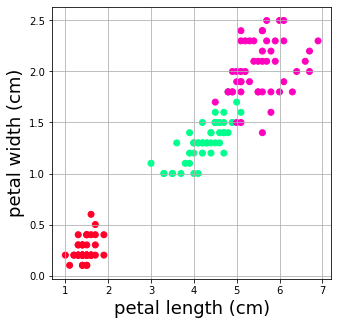

In [10]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c = iris.target, cmap = 'gist_rainbow')
plt.xlabel('petal length (cm)', fontsize=18)
plt.ylabel('petal width (cm)', fontsize=18)
plt.grid()
plt.show()

### Vẽ vị trí trung tâm 

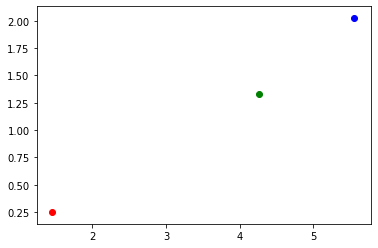

In [9]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
plt.show()

### Vẽ vị trí trung tâm và kết hợp với dữ liệu 

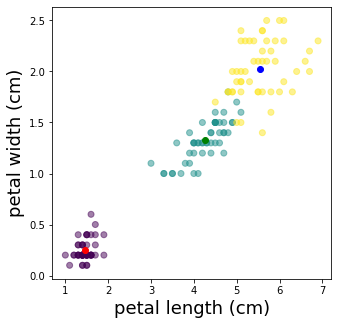

In [12]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c = iris.target, alpha=0.5)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
plt.xlabel('petal length (cm)', fontsize=18)
plt.ylabel('petal width (cm)', fontsize=18)
#plt.grid()
plt.show()

## Tính khoảng cách giữa các centroids với vị trí dữ liệu và cập nhật lại vị trí k
### Nếu k thay đổi thỳ update. Cập nhật lại centroids

In [13]:
def assignment(df, centroids):
    for i in range(3):
   # for i in centroids.keys():
        #sprt((x1-x2)^2 + (y1-y2)^2)
        df['khoangcach_tu_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroids_distance_cols = ['khoangcach_tu_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('khoangcach_tu_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df


In [14]:
df = assignment(df, centroids)

In [15]:
df

,x,y,cluster,khoangcach_tu_0,khoangcach_tu_1,khoangcach_tu_2,closest,color
0,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
1,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
2,1.3,0.2,0,0.168404,3.166935,4.627503,0,r
3,1.5,0.2,0,0.059666,2.980852,4.444432,0,r
4,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
...,...,...,...,...,...,...,...,...
145,5.2,2.3,2,4.265157,1.353616,0.446072,2,b
146,5.0,1.9,2,3.905529,0.936523,0.566198,2,b
147,5.2,2.0,2,4.129063,1.156666,0.352959,2,b
148,5.4,2.3,2,4.441482,1.499425,0.313337,2,b


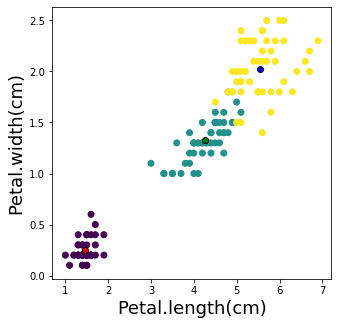

In [17]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c = iris.target, alpha=1)
for i in centroids.keys():
    plt.scatter( *centroids[i], color=colmap[i], edgecolors='k')
plt.xlabel('Petal.length(cm)', fontsize=18)
plt.ylabel('Petal.width(cm)', fontsize=18)

plt.show()

### Cập nhật lại k. Nếu k thay đổi cập nhật lại vị trí trung tâm

In [18]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k


In [19]:
centroids = update(centroids)
centroids

{0: [1.4620000000000002, 0.2459999999999999],
 1: [4.269230769230769, 1.342307692307692],
 2: [5.595833333333332, 2.0374999999999996]}

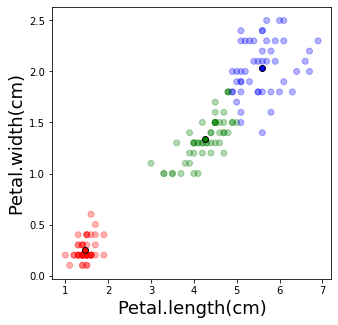

In [21]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color = df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter( *centroids[i], color=colmap[i], edgecolors='k')
plt.xlabel('Petal.length(cm)', fontsize=18)
plt.ylabel('Petal.width(cm)', fontsize=18)
#plt.grid()
plt.show()

In [22]:
df = assignment(df, centroids)

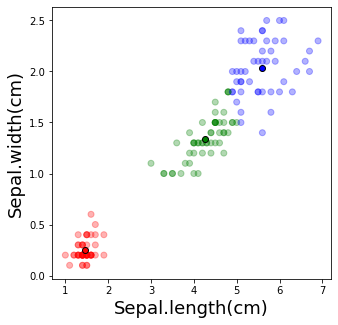

In [23]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i], edgecolors= 'k')
plt.xlabel('Sepal.length(cm)', fontsize=18)
plt.ylabel('Sepal.width(cm)', fontsize=18)
#plt.grid()
plt.show()

In [24]:
while True:
    closest_centroids = df['closest'].copy(deep = True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
        

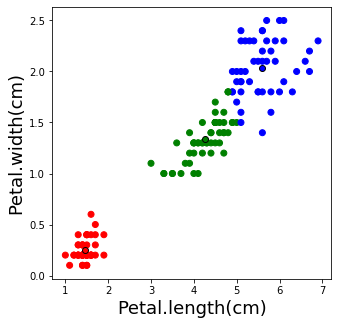

In [25]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i], edgecolors= 'k')
plt.xlabel('Petal.length(cm)', fontsize=18)
plt.ylabel('Petal.width(cm)', fontsize=18)
#plt.grid()
plt.show()